#  <font color = 545AA7>Bond Angles and Ramachandran Plot </font>

This notebook is taken and adapted from:
https://weisscharlesj.github.io/BiopythonRamachandran/README.html as well as https://colab.research.google.com/github/pb3lab/ibm3202/blob/master/tutorials/lab02_molviz.ipynb


In this Jupyter notebook, you will be introduced to measuring the **angles** and **dihedral angles** along the backbone of peptide chains. The goals of this notebook are to:


- Measure angles and dihedral angles using biopython
- Examine angle distributions using histogram plots
- Generate Ramachandran plots by multiple plotting methods

**Dihedral angles** are torsional angles formed by four adjacent atoms. There are three types of dihedral angles along the peptide backbone designated with phi ($\phi$), psi ($\psi$), and omega ($\omega$) as shown below. These angles typically fall within specific ranges due to steric repulsion and bond order. In this notebook, we will explore these typical ranges.

## Preparation steps
First we need to install some python modules and some data in your google colab. This downloads some protein structures in your disk space on your colab.



In [32]:
!pip install jupyter_contrib_nbextensions
!pip -q install Biopython
!pip -q install matplotlib
!pip -q install py3Dmol
import Bio.PDB
from Bio.PDB.vectors import calc_dihedral, calc_angle

import matplotlib.pyplot as plt
%matplotlib inline
import os

import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)
print("Packages imported")
!wget -nc -O bicourse.zip https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:bicourse.zip
!wget -nc -O peptide3.txt https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:peptide3.txt
!unzip -oq bicourse.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428782 sha256=60a0bc14ae1c5a2ca5189cf7287242b84226197f5b0794f335dff807b23dd465
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17483 sha256=fb1919bb72d79e14363e1c2965149955b9727dc894d8c6fa271c688147d37836
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core
Packages 

Also with the downloaded package an image is unpacked that shows the peptide bond between amino acids and marks the 3 angles that are important in the peptide bonds.


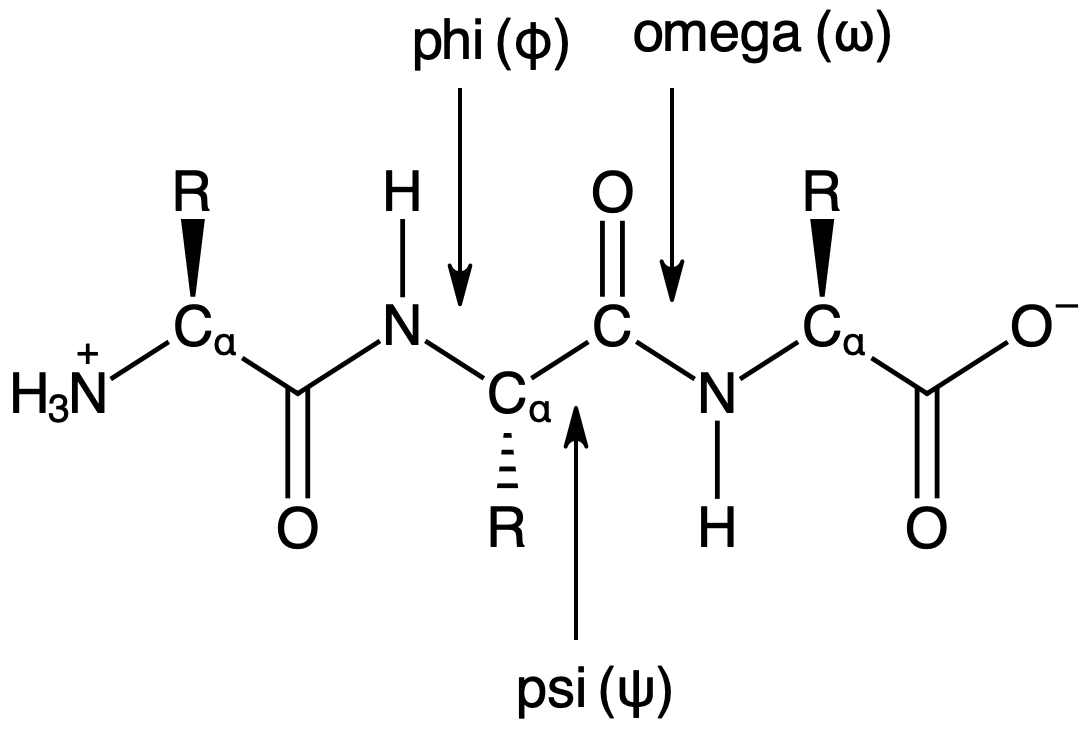

In [3]:

from IPython.display import Image
# Show an image that is local to the colab filesystem.
Image("tripeptide.png", width=400, embed=True)

# View 3D content in the notebook
The next cell will display a small peptide of 3 amino acids in the notebook. We will clarify the meaning of different angles on this peptide

In [31]:
import py3Dmol

view=py3Dmol.view(width=1200,height=400,viewergrid=(1,2),linked=True)
#The following lines are used to add the addModel class
#to read the PDB files of chain B and C
#view.addModel(str(data),'pdb')
proteinmodel=open('peptide3.txt', 'r').read()
view.addModel(proteinmodel,'pdb')
#view.addModel(open('6ANE_C.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('black',viewer=(0,1))
view.setStyle({'stick': {'colorscheme':'rasmol'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.9},viewer=(0,1))
view.addLabel("Glycin",{'fontColor':'black','fontOpacity':1,'backgroundOpacity':0},{'resi':31},viewer=(0,0))
view.addLabel("Cystein",{'fontColor':'black','fontOpacity':1,'backgroundOpacity':0},{'resi':32},viewer=(0,0))
view.addLabel("Isoleucine",{'fontColor':'black','fontOpacity':1,'backgroundOpacity':0},{'resi':33},viewer=(0,0))

#Here we set the visualization style for chain B and C
#And we finally visualize the structures using the command below
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## <font color = 545AA7> 1. Measure Single Peptide Angles </font>

The `Bio.PDB.vectors` module of biopython contains two functions called `calc_angle()` and `calc_dihedral()` for calculating conventional angles or dihedral angles, respectively, along the backbone of a peptide. These function take the vector coordinates (xyz) of the three or four atoms that define the angle or dihedral angle.

~~~python
calc_angle(<vector>, <vector>, <vector>)

calc_dihedral(<vector>, <vector>, <vector>, <vector>)
~~~

The vectors can be obtained from the residues using the `get_vector()` function.

For example, let's say we want to know the N-C$_\alpha$-C angle. The first block of code loads a PDB file and grabs the first amino acid residue of the first chain of the peptide structure.


In [6]:
parser = Bio.PDB.PDBParser()
structure = parser.get_structure('peptide', 'peptide3.txt')

for chain in structure.get_chains():
   gly = chain[31]
   cys = chain[32]
   ile = chain[33]
   N_gly  = gly['N'].get_vector()
   CA_gly = gly['CA'].get_vector()
   C_gly  = gly['C'].get_vector()
   ang_gly = calc_angle(N_gly, CA_gly,   C_gly)

   C_cys  = cys['C'].get_vector()
   N_cys  = cys['N'].get_vector()
   CA_cys = cys['CA'].get_vector()
   ang_cys = calc_angle(N_cys, CA_cys, C_cys)

   C_ile  = ile['C'].get_vector()
   N_ile  = ile['N'].get_vector()
   CA_ile = ile['CA'].get_vector()
   ang_ile = calc_angle(N_ile, CA_ile, C_ile)

print("gly: "+str(ang_gly))
print("cys: "+str(ang_cys))
print("ile: "+str(ang_ile))


gly: 1.950290317382052
cys: 1.908838186124041
ile: 1.9156125896543617


### <font color = F28500> Practice: Find Angle in Degrees </font>

Copy and paste the code from the above code cell and modify it to find the angle of the C$_\alpha$-C-O bond. The oxygen in the amino-acid residue is designated by `['O']`.

If you have time, convert the output from radiants $\rightarrow$ degrees.

$$ degrees = radians \times \frac{180}{\pi} $$

In [7]:
print("gly: "+str(ang_gly*(180/3.14)))
print("cys: "+str(ang_cys*(180/3.14)))
print("ile: "+str(ang_ile*(180/3.14)))

gly: 111.8000818881431
cys: 109.42384506443547
ile: 109.81218666808442


### <font color = F28500> Bond Angle vs Dihedrals</font>
Angles between 3 points in a molecule are bond angles. Dihedrals are angles between two planes defined by 4 points (german: Diederwinkel or Torsionswinkel)

In a protein or peptide the following angles are defined along the peptide backbone:

φ (between C' − N − Cα − C')

ψ (between N − Cα − C' − N) and

ω (between Cα − C' − N − Cα)

In order to calculate Omega, the dihedral between the orientation of two adjacent amino acids connected via the peptide bond, one needs to do the following:


In [8]:
phi_gly_cys = calc_dihedral(C_gly,N_gly,CA_cys,C_cys) * (180 / 3.14159)
phi_cys_ile = calc_dihedral(C_cys,N_cys,CA_ile,C_ile) * (180 / 3.14159)
print("Phi gly-cys: "+str(phi_gly_cys))
print("Phi cys-ile: "+str(phi_cys_ile))
psi_gly_cys = calc_dihedral(N_gly,CA_gly,C_cys,N_cys) * (180 / 3.14159)
psi_cys_ile = calc_dihedral(N_cys,CA_cys,C_ile,N_ile) * (180 / 3.14159)
print("Psi gly-cys: "+str(psi_gly_cys))
print("Psi cys-ile: "+str(psi_cys_ile))
omega_gly_cys = calc_dihedral(CA_gly, C_gly, N_cys, CA_cys) * (180 / 3.14159)
omega_cys_ile = calc_dihedral(CA_cys, C_cys, N_ile, CA_ile) * (180 / 3.14159)

print("Omega gly-cys: "+str(omega_gly_cys))
print("Omega cys-ile: "+str(omega_cys_ile))


Phi gly-cys: -80.88864902875245
Phi cys-ile: -29.468549509205022
Psi gly-cys: -57.59989458178262
Psi cys-ile: 81.79782469527777
Omega gly-cys: 171.49629978402265
Omega cys-ile: -178.07700228349495


## <font color = 545AA7> 2. Examine Distributions of Dihedrals </font>

Let's now examine the distribution of the omega ($\omega$) bond angles using a histogram plot. In the code cell below, there is code that defines the Python function `get_omega()` you can use to measure all the omega dihedral angles.

### <font color = F28500> Run the pre-written code in the following cell. </font>

In [84]:
parser = Bio.PDB.PDBParser()
structure_6x8j = parser.get_structure('6x8j', '6x8j.pdb')



In [85]:
# Run this cell to define a function you can use in subsequent cells

def get_abs_omega(file):
    """Return list of absolute value omega dihedral angles in radians"""
    omega_list = []
    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('protein', file)
    pp = Bio.PDB.PPBuilder().build_peptides(structure[0])
    for chain in pp:
        for res in range(0, len(chain) - 1):
            try:
                # get vectors for this peptide and the N from the subsequent peptide
                CA = chain[res]['CA'].get_vector()
                C = chain[res]['C'].get_vector()
                N_next = chain[res + 1]['N'].get_vector()
                CA_next = chain[res + 1]['CA'].get_vector()
                omega = calc_dihedral(CA, C, N_next, CA_next) * (180 / 3.14159)
                omega_list.append(abs(omega))
            except KeyError:
                continue
    return omega_list

Now you will use the function in the following cell. Place the name of a PDB file in quotes inside the parentheses, and the function will return a list of omega dihedral angles in degrees.

Example:
~~~python
get_abs_omega('5grt.pdb')
~~~



### <font color = F28500> Practice: Plot Omega Angle Distribution of a single protein</font>

1. Run the `get_abs_omega()` function below for the **6x8j.pdb** protein. You will also want to assign this list of angles to a variable for later use.
2. Plot the distribution of omega angles using the `plt.hist()` histogram plot function. See the first Jupyter notebook if you need review.
3. What do you notice about the distribution? What is the structural reason for this? Write you answer in a markdown cell below. *Hint: the omega angle is centered on the peptide amide bond.*

In [86]:
omega = get_abs_omega('6x8j.pdb')

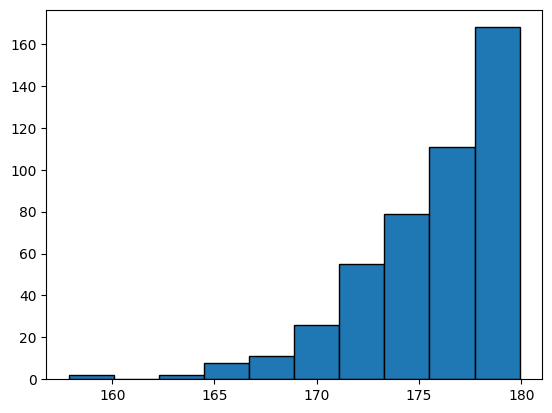

In [87]:
plt.hist(omega, bins=10, edgecolor='black')
plt.show()

### <font color = F28500> Practice: Plot Omega Angle Distribution of many proteins</font>


In [88]:
omega = []

import os
for file in os.listdir('top80'):
    if file.endswith('pdb'):
        omega.extend(get_abs_omega(os.path.join('top80/',file)))
print(omega)

[178.69130551672762, 167.49882787974136, 171.1883771437606, 175.21354370383526, 178.01710461708277, 173.48409044510086, 175.51556267500303, 170.83750904152527, 176.8072623179932, 174.80505771477658, 176.54477036882648, 173.5508680505055, 177.00316030712003, 176.05134238420897, 176.55571027105657, 179.10512323958585, 179.1722655848763, 178.4644647962796, 178.77067956675762, 179.07548544193318, 178.94341032857065, 175.5444342233114, 177.47700703358447, 176.02213181482122, 176.19646052052747, 178.35637865897215, 176.99437048609485, 179.84288425881877, 179.09842177202233, 173.7525650860309, 176.68529770175277, 178.021634509461, 166.9340630272837, 178.79798898604386, 162.13998408307552, 171.2394923070794, 170.7141554993166, 169.50579233225034, 177.61662730826427, 175.47105506402139, 173.07417559240858, 164.98994236788033, 179.72527629369958, 178.31518674906906, 175.12773913704586, 177.2953470626911, 173.2853380821665, 174.17195983994574, 178.40808981135876, 173.30389272723843, 173.554201191

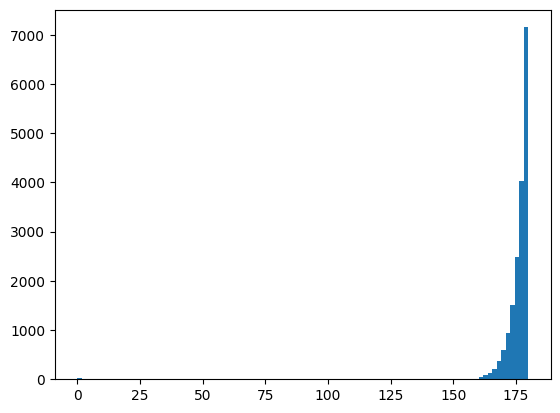

In [89]:
plt.hist(omega, bins=100)
plt.show()

The distribution only shows proteins with omega values from 0 to 180. An angle of 0 is a protein in 'cis' Conformation. An angle of 180 is a protein in 'trans' conformation.




## <font color = 545AA7> 3. Ramachandran Plots from Single Protein </font>

A **Ramachandran plot** is a 2D plot of the psi ($\psi$) versus the phi ($phi$) dihedral angles. Below is a function that takes the file name of a PDB file and returns two lists: a list of phi and and list of psi angles.

e.g.,  `ramachandran('1abc.pdb')` -> `[phi], [psi]`

In [16]:
def ramachandran(PDB):
    """Accepts a PDB file name (string) and returns two lists of phi
    and psi angles, respectively.
    """
    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('protein', PDB)
    polypeptide = Bio.PDB.PPBuilder().build_peptides(structure[0])

    phi = []
    psi = []
    omega = []

    for strand in polypeptide:
        phipsi = strand.get_phi_psi_list()
        for point in phipsi:
            try:
                phi_point = point[0] * (180 / 3.14159)
                psi_point = point[1] * (180 / 3.14159)
                phi.append(phi_point)
                psi.append(psi_point)
            except TypeError:
                pass

    return phi, psi

Let's run the `ramachandran` function with a single **6x8j.pdb** protein file and plot the result in a `scatter(x,y)` plot.

Text(0, 0.5, 'psi $\\psi$, degrees')

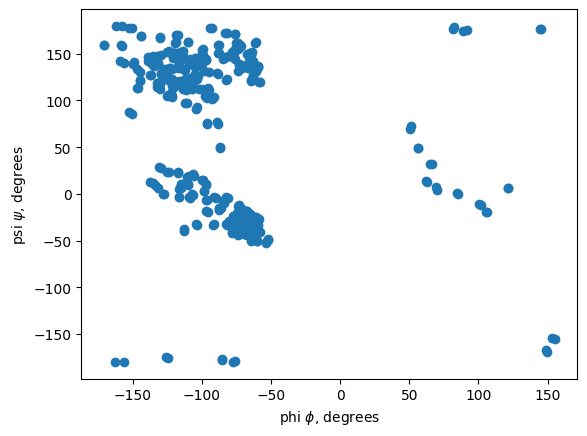

In [17]:
phi, psi = ramachandran('6x8j.pdb')

plt.scatter(phi, psi)
plt.xlabel('phi $\phi$, degrees')
plt.ylabel('psi $\psi$, degrees')

## <font color = 545AA7> 4. Ramachandran Plots from Multiple Top8000 Proteins </font>

We will now collect data on a larger number of PDB files and plot the result. You have been provided a folder containing a few PDB files from the Top8000 dataset. Calculating the phi and psi angles for all 8000 often requires at least a few minutes of computer time, so for the sake of time, we will only work with a subset of this dataset. You can download the full dataset from [http://kinemage.biochem.duke.edu/databases/top8000.php](http://kinemage.biochem.duke.edu/databases/top8000.php) if you wish to use the full dataset *at a later date*.

In [18]:

top80 = 'top80/'

In [19]:
top80 = 'top80/'
phi_list = []
psi_list = []

for file in os.listdir(top80):
    if file.endswith('pdb'):
        phi, psi = ramachandran(os.path.join('top80/',file))
        phi_list.extend(phi)
        psi_list.extend(psi)

Text(0, 0.5, 'psi $\\psi$, degrees')

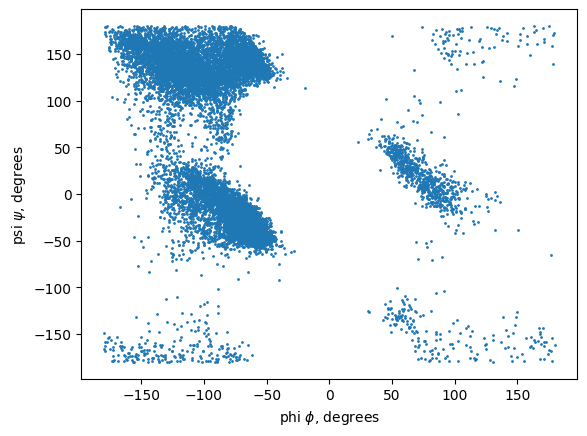

In [20]:
plt.scatter(phi_list, psi_list, s=1)
plt.xlabel('phi $\phi$, degrees')
plt.ylabel('psi $\psi$, degrees')

### <font color = 545AA7> Other Plotting Representations </font>

One issue with the scatter plot above is that it's difficult to see any features inside the two large regions on the left side. Once there is a critical mass of dots in the scatter plot, it's just a solid color. There are other plotting libraries and functions available to help. Along with the popular matplotlib library, there is the [seaborn](https://seaborn.pydata.org/) Python plotting library that includes a selection of relatively simple to use plotting functions that can help.

Text(0, 0.5, 'psi $\\psi$, degrees')

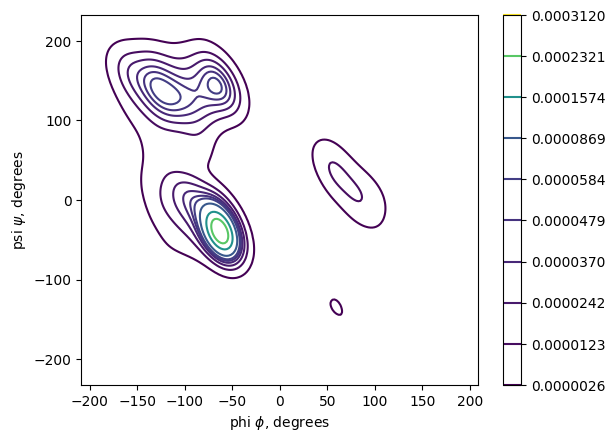

In [21]:
import seaborn as sns
sns.kdeplot(x=phi_list, y=psi_list, cbar=True, cmap='viridis')
plt.xlabel('phi $\phi$, degrees')
plt.ylabel('psi $\psi$, degrees')

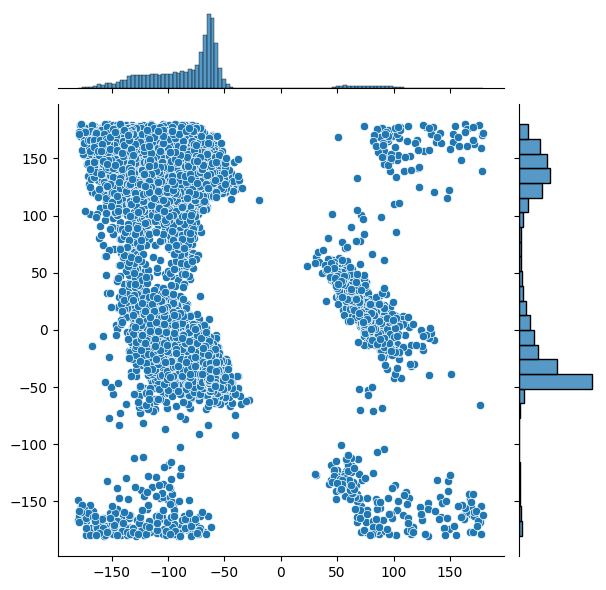

In [22]:
sns.jointplot(x=phi_list, y=psi_list)

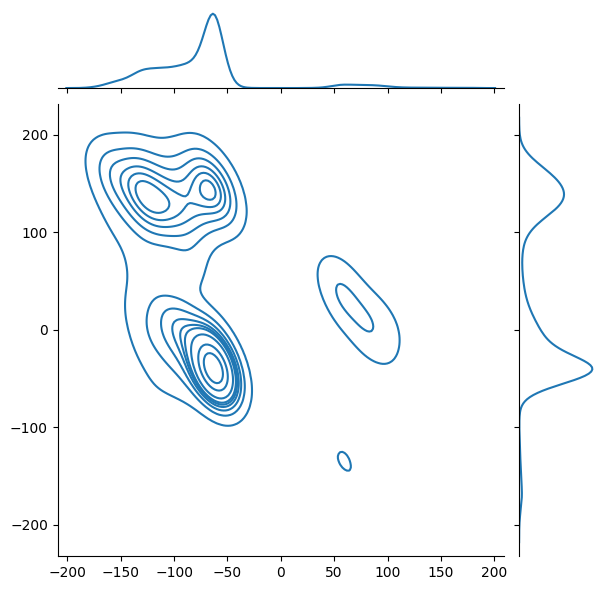

In [23]:
sns.jointplot(x=phi_list, y=psi_list, kind='kde')

### <font color = F28500> Practice: Plotting Ramachandrans Plots with Secondary Structure </font>

For a little extra practice, let's visualize how the presence of helix and sheet **secondary structures** affects the phi and psi angles. Run the following two code cells to harvest a the phi and psi angles from your 80 protein dataset, but this time, it will also record if each amino acid residue is unstructured, in a helix, or in a sheet. *Note: helices in this dataset are a mixture of $\alpha$-helices or $3_{10}$-helices*

In [75]:
import traceback

def get_secondary_list(file):
    '''(string) -> ([list], [list])

    Accepts a PDB file name (string) and returns two lists of residues
    contained inside helices and sheets, respectively. The residues are
    strings containing the chain identifies and residue number

    >>> ('1abc.pdb') -> [['A34', 'A35', 'A36'], ['A74', 'A75', 'A93', 'A94']]
    '''

    alpha = []
    three_ten = []
    sheets = []

    with open(file, 'r') as f:
        for line in f:
            if line.startswith('HELIX'):
                chain = line[19:20]
                start = line[21:25].strip()
                stop = line[33:37].strip()

                if line[39:40] == '1':
                    for res in range(int(start), int(stop) + 1):
                        alpha.append(chain + str(res))
                if line[39:40] == '5':
                    for res in range(int(start), int(stop) + 1):
                        three_ten.append(chain + str(res))

            if line.startswith('SHEET'):
                chain = line[21:22]
                start = line[22:26].strip()
                stop = line[33:37].strip()

                for res in range(int(start), int(stop) + 1):
                    sheets.append(chain + str(res))

    return alpha, three_ten, sheets

def get_phi_psi_sec_list(file,getOmega=False):
    """Return list of absolute value omega dihedral angles in radians"""

    alpha, three_ten, beta = get_secondary_list(file)

    phi_psi_structure = []
    omega_list = []

    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('protein', file)

    for chain in structure[0]:
        # get chain ID and residue numbers
        ID = chain.get_id()
        seq_ID = [residue.get_id()[1] for residue in chain]

        pp = Bio.PDB.PPBuilder().build_peptides(chain)[0]

        for res in range(1, len(pp) - 1):
            res_ID = ID + str(seq_ID[res])
            #print(res_ID)
            try:
                # get vectors for this peptide and the N from the subsequent peptide

                C_prev = pp[res - 1]['C'].get_vector()
                CA = pp[res]['CA'].get_vector()
                C = pp[res]['C'].get_vector()
                N = pp[res]['N'].get_vector()
                N_next = pp[res + 1]['N'].get_vector()
                CA_next = pp[res + 1]['CA'].get_vector()
                phi = calc_dihedral(C_prev, N, CA, C) * (180 / 3.14159)
                psi = calc_dihedral(N, CA,C, N_next) * (180 / 3.14159)
                omega = calc_dihedral(CA, C, N_next, CA_next) * (180 / 3.14159)

                if res_ID in alpha:
                    structure = 'alpha-helix'
                elif res_ID in three_ten:
                    structure = 'three_ten-helix'
                elif res_ID in beta:
                    structure = 'sheet'
                else:
                    structure = 'unstructured'

                phi_psi_structure.append([phi, psi, structure])
                omega_list.append(omega)
            except KeyError:
              pass

        if (getOmega):
          return omega_list
        else:
          return phi_psi_structure

In [76]:
phi_psi_sec = []
omega_list = []
for file in os.listdir('top80/'):
    if file.endswith('pdb'):
        angles = get_phi_psi_sec_list(os.path.join('top80/',file))
        phi_psi_sec.extend(angles)
        angles_omega=get_phi_psi_sec_list(os.path.join('top80/',file),True)


####Practice

Question: Why is the distribution of omega angles for all proteins shown above not between 0 and 360 (or -180 and 180) degrees? In the peptide example, we also got approx. -180 and +180? To answer this, you need to uncomment the code cell further down in the Practice cell.

Get the distribution of omega on all proteins, similar like above. Uncomment the code in the next line and show the distribution of omega. Compare this to the histogram from above and answer the question from above.

In [77]:
#print(angles_omega)
#plt.hist(angles_omega, bins=100)
#plt.show()

In [78]:
import pandas as pd
df = pd.DataFrame(data=phi_psi_sec, columns=['phi','psi', 'structure'])
df

,phi,psi,structure
0,-137.764897,149.515692,sheet
1,-96.166423,127.146102,sheet
2,-104.003272,119.951405,sheet
3,-111.122556,117.645113,sheet
4,-117.973244,126.241384,sheet
...,...,...,...
10700,-117.076229,120.494910,sheet
10701,-120.739321,125.712666,sheet
10702,-108.932199,128.960243,sheet
10703,-132.219196,131.795275,sheet


Now let's plot the data using the **seaborn** plotting library which contains an assortment of plotting functions that produce more complex plots with relatively few lines of code.



<Axes: xlabel='phi', ylabel='psi'>

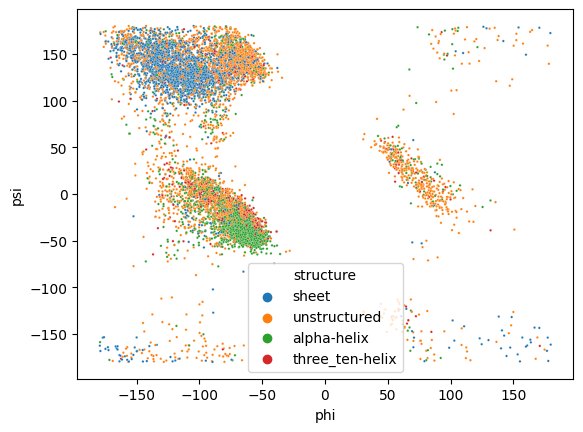

In [79]:
sns.scatterplot(x=df['phi'], y=df['psi'], hue=df['structure'], s=3)

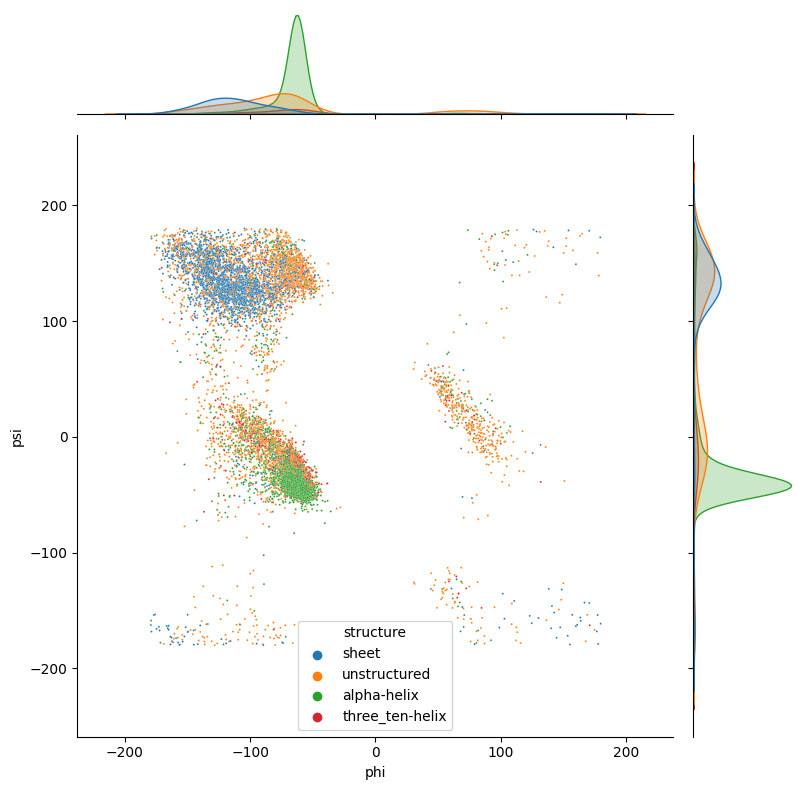

In [80]:
sns.jointplot(x=df['phi'], y=df['psi'], hue=df['structure'], s=2, height=8)

In [81]:
df_alpha = df[df['structure'] == 'alpha-helix']
df_310 = df[df['structure'] == 'three_ten-helix']

df_helix = pd.concat((df_alpha, df_310))

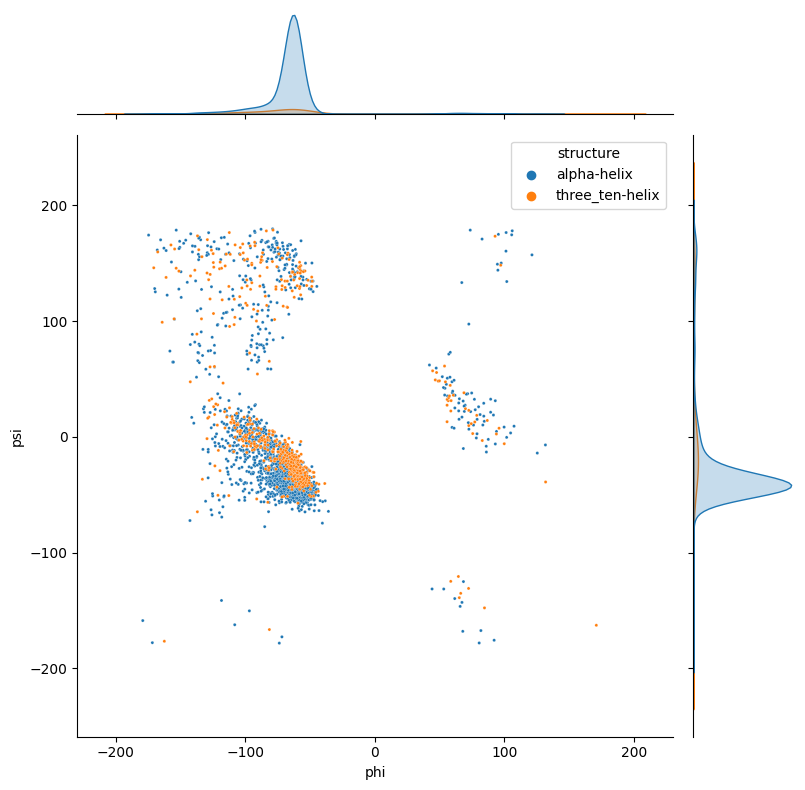

In [82]:
sns.jointplot(x=df_helix['phi'], y=df_helix['psi'], hue=df_helix['structure'], s=5, height=8)